<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/project4/hint_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



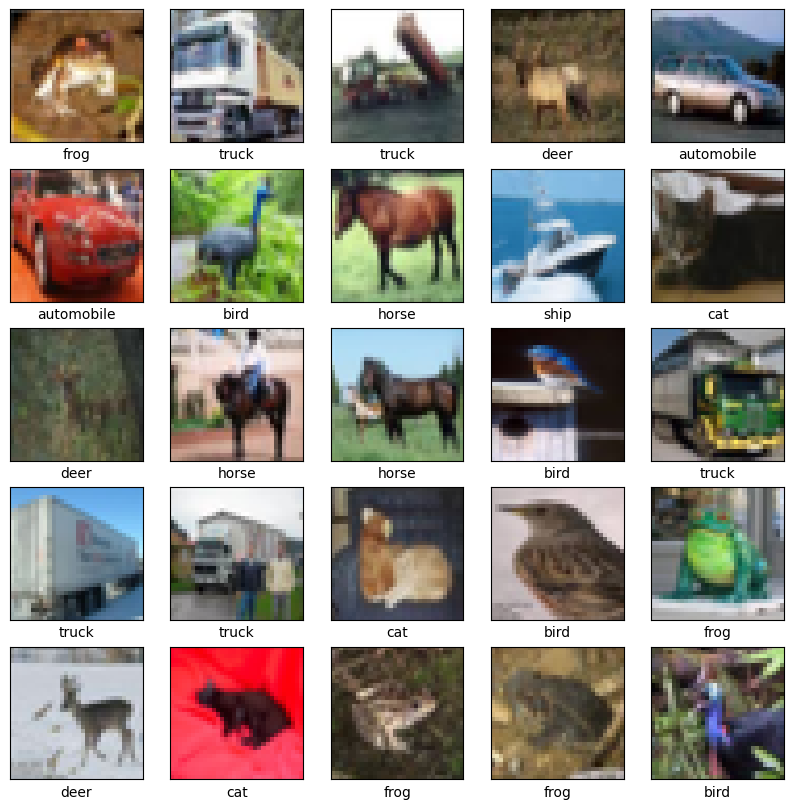

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=10,
#                     validation_data=(test_images, test_labels))
history = model.fit(train_images, train_labels, epochs=5,
                     validation_split = .2)

Epoch 1/5
1250/1250 [==============================] - 11s 6ms/step - loss: 1.5355 - accuracy: 0.4335 - val_loss: 1.2179 - val_accuracy: 0.5604
Epoch 2/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0412 - accuracy: 0.6302 - val_loss: 0.9592 - val_accuracy: 0.6626
Epoch 3/5
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8235 - accuracy: 0.7113 - val_loss: 0.8234 - val_accuracy: 0.7127
Epoch 4/5
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6959 - accuracy: 0.7570 - val_loss: 0.7720 - val_accuracy: 0.7264
Epoch 5/5
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5956 - accuracy: 0.7922 - val_loss: 0.8139 - val_accuracy: 0.7200


313/313 - 1s - loss: 0.8276 - accuracy: 0.7212 - 715ms/epoch - 2ms/step
0.8275750875473022 0.7211999893188477


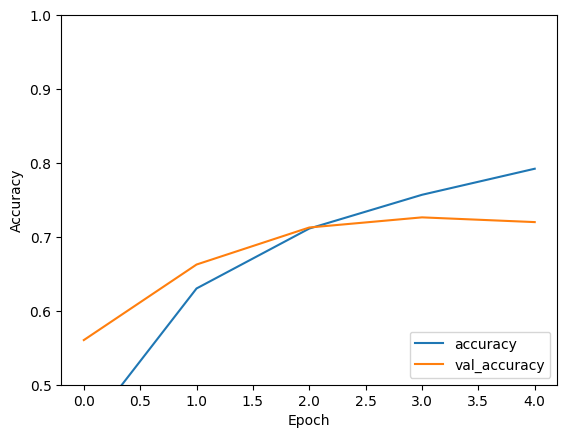

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_loss,test_acc)

In [8]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [9]:
import numpy as np

from sklearn.metrics import confusion_matrix
predictions_new = np.argmax(predictions,axis=1)
confusion_matrix(test_labels,predictions_new)

array([[775,  24,  60,  20,  29,   4,  19,  12,  35,  22],
       [  6, 910,   4,   6,   4,   2,  17,   1,  18,  32],
       [ 45,   5, 597,  56, 111,  33, 122,  19,   9,   3],
       [ 16,   8,  84, 563,  84,  79, 141,   9,  13,   3],
       [  9,   2,  61,  45, 751,  10,  91,  23,   5,   3],
       [  7,   6,  80, 261,  64, 463,  79,  35,   2,   3],
       [  2,   1,  29,  37,  17,   2, 908,   1,   3,   0],
       [ 14,   3,  62,  72, 113,  34,  31, 668,   1,   2],
       [ 87,  34,  15,  15,   9,   2,  20,   2, 781,  35],
       [ 30,  93,  10,  23,   7,   4,  14,  11,  12, 796]])

In [10]:
!pip install scikit-learn==1.1.3

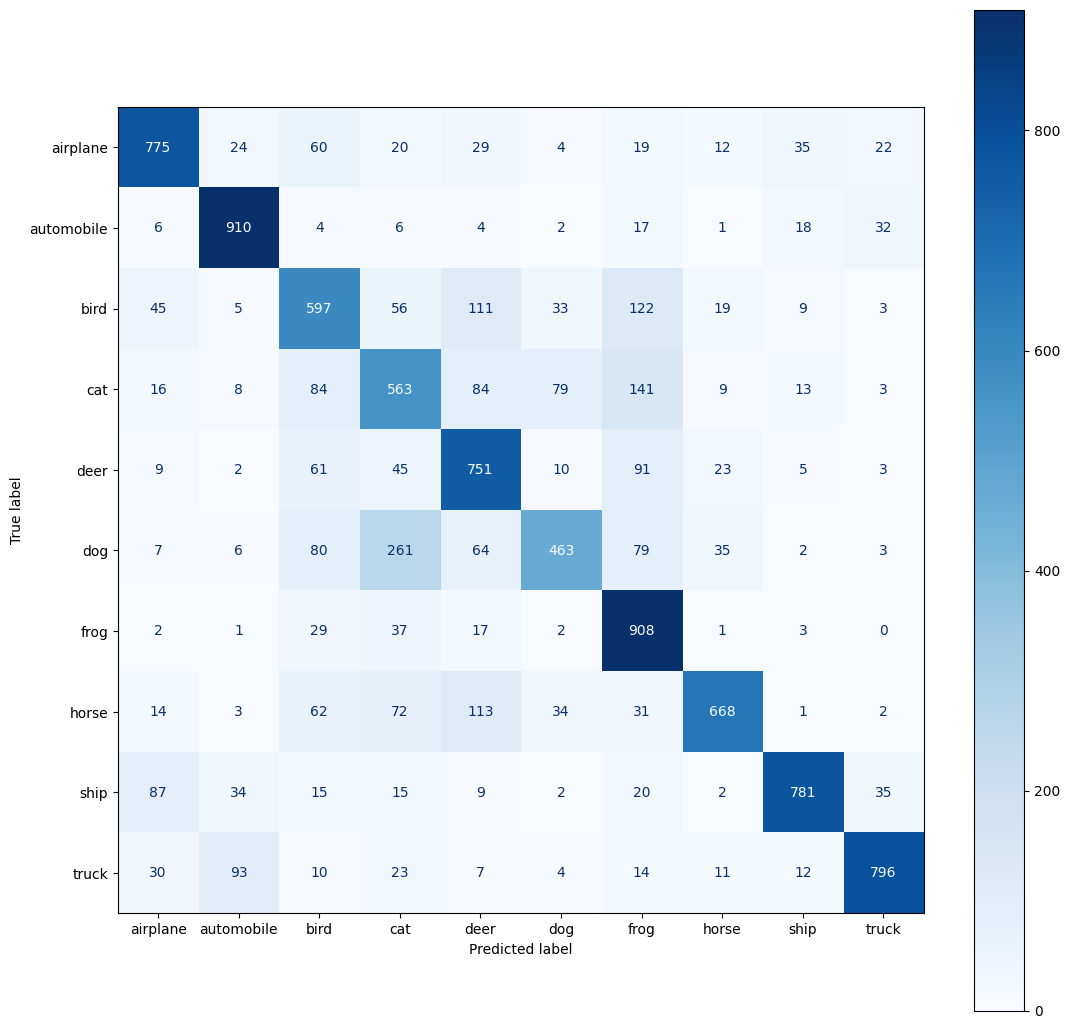

In [11]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, predictions_new)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(13,13)) # For changing the size of the plot
cmd.plot(ax=ax, cmap="Blues", values_format='.5g') # The .5g is for removing scientific notation in the confusion matrix

# plot_confusion_matrix(model, X_test, y_test, cmap='Blues')



In [12]:
from sklearn.metrics import classification_report

print(classification_report(test_labels,predictions_new))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.84      0.91      0.87      1000
           2       0.60      0.60      0.60      1000
           3       0.51      0.56      0.54      1000
           4       0.63      0.75      0.69      1000
           5       0.73      0.46      0.57      1000
           6       0.63      0.91      0.74      1000
           7       0.86      0.67      0.75      1000
           8       0.89      0.78      0.83      1000
           9       0.89      0.80      0.84      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000

